In [1]:

from scipy.sparse import spdiags,linalg

In [2]:
def five_pt_laplacian(m):
    e=np.ones(m**2)
    e2=([0]+[1]*(m-1))*m
    h=1./(m+1)
    A=np.diag(-4*e,0)+np.diag(e2[1:],-1)+np.diag(e2[1:],1)+np.diag(e[m:],m)+np.diag(e[m:],-m)
    A/=h**2
    return A

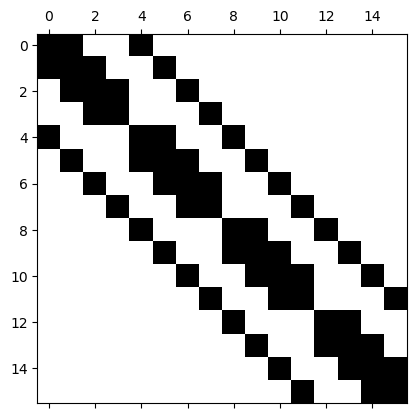

In [3]:
A=five_pt_laplacian(4)
plt.spy(A)

In [16]:
def five_pt_laplacian_sparse(m):
    e=np.ones(m**2)
    e2=([1]*(m-1)+[0])*m
    e3=([0]+[1]*(m-1))*m
    h=1./(m+1)
    A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-m,m],m**2,m**2)
    A/=h**2
    return A

In [17]:
U=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(U)
print(U.reshape([9]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]


In [18]:
V = U.reshape(-1)
print(V)

[1 2 3 4 5 6 7 8 9]


In [19]:
# Define the RHS function:
f = lambda x,y: -(20*y**3+9*np.pi**2*(y-y**5.))*np.sin(3*np.pi*x)

#Set up the grid:
m=100
x=np.linspace(0,1,m+2); x=x[1:-1]
y=np.linspace(0,1,m+2); y=y[1:-1]
X,Y=np.meshgrid(x,y)
#Set up and solve the linear system
A=five_pt_laplacian_sparse(m).tocsr()
F=f(X,Y).reshape([m**2])
U=linalg.spsolve(A,F)

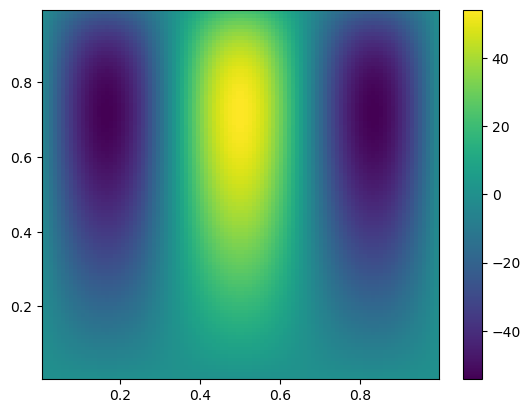

In [20]:

plt.pcolor(X,Y,f(X,Y));
plt.colorbar();

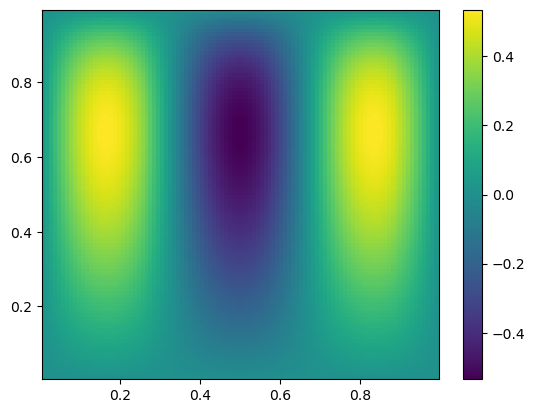

In [21]:
U=U.reshape([m,m])
plt.pcolor(X,Y,U)
plt.colorbar();

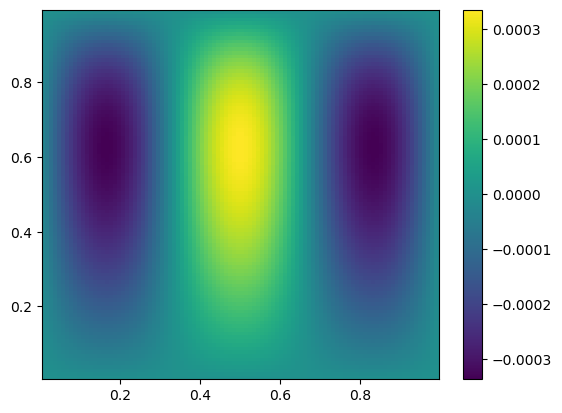

In [22]:
U_exact=[]
U_exact=(Y-Y**5)*np.sin(3*np.pi*X)
plt.clf()
plt.pcolor(X,Y,U_exact-U)
plt.colorbar()

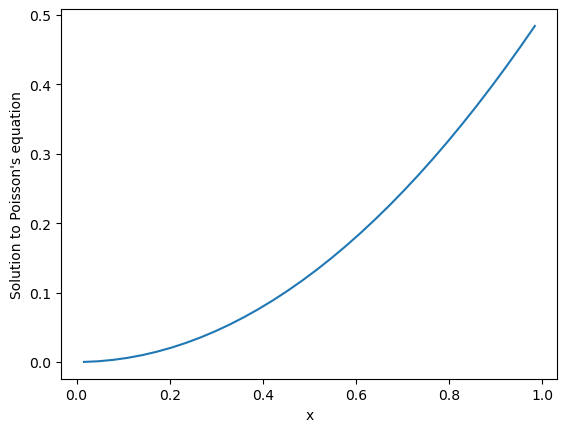

In [4]:
from pde import CartesianGrid, ScalarField, solve_poisson_equation

grid = CartesianGrid([[0, 1]], 32, periodic=False)
field = ScalarField(grid, 1)
result = solve_poisson_equation(field, bc=[{"value": 0}, {"derivative": 1}])

result.plot()

In [5]:
type(A)

numpy.ndarray

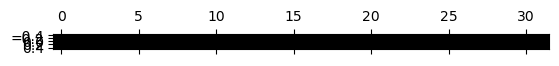

In [7]:
plt.spy(grid.coordinate_arrays[0].reshape(1, 32))

In [8]:
def fpp(m,method='slice',do_plot=True):
    x = np.linspace(0,1,m+2)
    f = 1 + x + 3*x**2 + 2*np.sin(5*x)
    h= 1./(m+1)
    d2f = np.zeros(m+2)    
    
    if method=='loop':
        for i in range(1,m+1):
            d2f[i] = (f[i-1] - 2 *f[i] + f[i+1])/h**2
    
    elif method=='matvec':
        e = np.ones(m+2)
        A = (np.diag(-2*e,0)+np.diag(e[:-1],-1)+np.diag(e[:-1],1))/h**2
        d2f = np.dot(A,f)

    elif method=='slice':
        d2f[1:-1] = (f[0:-2] - 2*f[1:-1] + f[2:])/h**2
                
    d2f_ex = 6 - 50*np.sin(5*x)
    if do_plot:
        plt.plot(x,d2f_ex,'k',x[1:-1],d2f[1:-1],'or')

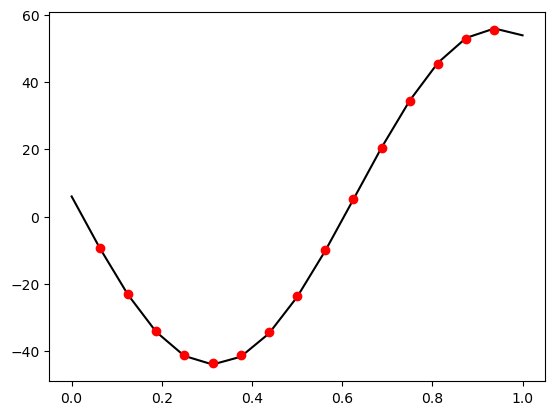

In [9]:
fpp(15,method='matvec') # Check that the result seems correct

In [10]:
%timeit fpp(1000,method='loop',do_plot=False)

1.38 ms ± 90 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%timeit fpp(1000,method='matvec',do_plot=False)

21 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit fpp(1000,method='slice',do_plot=False)

128 µs ± 5.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
def fpp(m,do_plot=True):
    x = np.linspace(0,1,m+2)
    f = 1 + x + 3*x**2 + 2*np.sin(5*x)
    h= 1./(m+1)
    d2f = np.zeros(m+2)
    d2f[1:-1] = (f[0:-2] - 2*f[1:-1] + f[2:])/h**2
    d2f_ex = 6 - 50*np.sin(5*x)
    
    error_vector = d2f[1:-1] - d2f_ex[1:-1]
    E1 = h*np.linalg.norm(error_vector,1)
    E2 = h**(0.5)*np.linalg.norm(error_vector,2)    
    Einf = np.linalg.norm(error_vector,np.inf)
    if do_plot:
        plt.plot(x,d2f_ex,'k',x[1:-1],d2f[1:-1],'or')
    return E1, E2, Einf

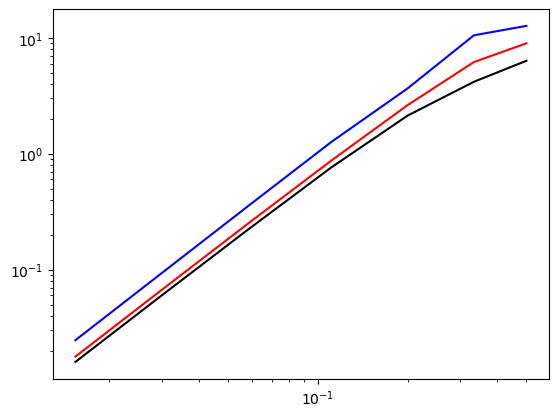

In [14]:
E1_list = []
E2_list = []
Einf_list = []

m_values = np.array((1,2,4,8,16,32,64))
for m in m_values:
    E1, E2, Einf = fpp(m)
    E1_list.append(E1)
    E2_list.append(E2)
    Einf_list.append(Einf)
    
plt.clf()
h_values = 1./(m_values+1.)
plt.loglog(h_values,E1_list,'k',h_values,E2_list,'r',h_values,Einf_list,'b')

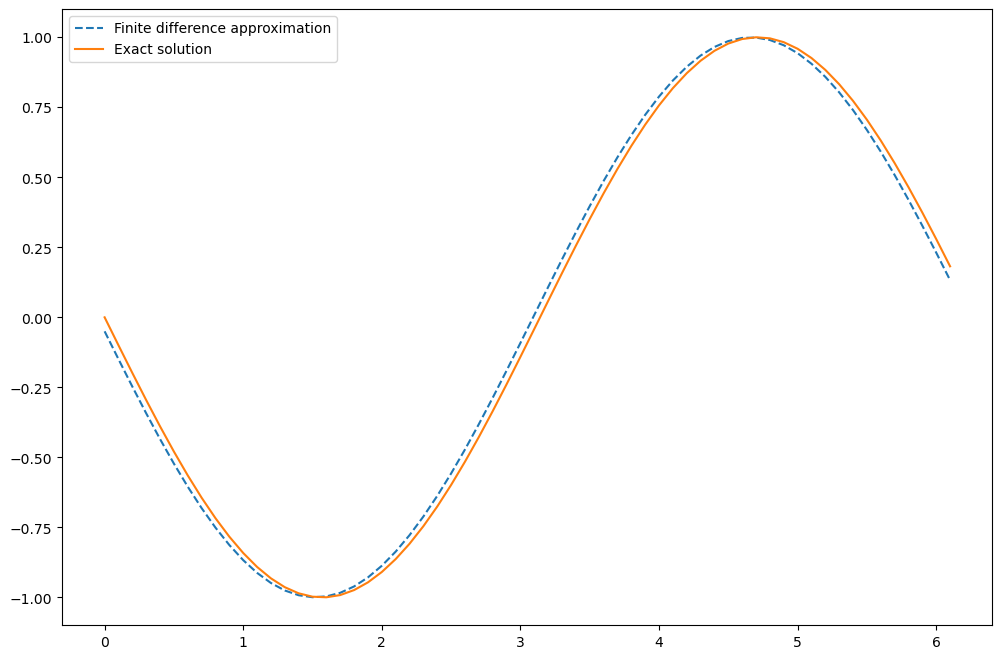

0.049984407218554114


In [15]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

In [35]:
for i in range(len(t)):
    print ("t=%6.3f u=%g" % (t[i], u[i]))

t= 0.000 u=1
t= 0.800 u=0.384615
t= 1.600 u=0.147929
t= 2.400 u=0.0568958
t= 3.200 u=0.021883
t= 4.000 u=0.00841653
t= 4.800 u=0.00323713
t= 5.600 u=0.00124505
t= 6.400 u=0.000478865
t= 7.200 u=0.000184179
t= 8.000 u=7.0838e-05
